In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score ,f1_score
from sklearn.ensemble import RandomForestClassifier,  StackingClassifier, AdaBoostClassifier


In [3]:
def Confusion_matrix(y_test,y_pred):
    if len(y_test) != len(y_pred):
            print('shape not same')
            return 0
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Total Samples: {len(y_test)})')

    plt.show()
    

In [4]:
'''
i made this function becouse df.info() was not showing information 
'''

def get_df_info(df:pd.DataFrame,cleaning:bool=False,
                col:list=[],show_all=False,min_persent:int=50,
                columns_to_map:list=[],col_refrence:dict={}):
    '''
    This function provides specific information about a DataFrame, including data cleaning options.
    '''
    del_col=[]
    if not show_all:
        print('showing all information is off')
    if cleaning:
        df=cleaning_df(df,col,columns_to_map,col_refrence)
    lenth=len(df)
    print('num of columns:', len(df.columns))
    print('num of rows: ',lenth)
    print('Col Name'.ljust(30), 'type'.ljust(13),'misssing values'.ljust(25), 'unique or nunique', ' max','min')
    print('__'*40)
    for i in df.columns:
        persent=round((df[f"{i}"].isnull().sum()/lenth)*100)
        nunique=df[f"{i}"].nunique()
        if persent == 0 and not show_all:
            continue
        else:
            print(i.ljust(30), str(df[f'{i}'].dtype).ljust(15),\
            str(df[f'{i}'].isnull().sum()).ljust(10),\
                f'{persent}%'.ljust(20),
                df[f"{i}"].unique() if  nunique<=3 else nunique,''.ljust(10),\
                  (df[f"{i}"].max(), df[f"{i}"].min()) if df[f"{i}"].dtype in ['int64','float64'] else ' ' )
            if persent>=min_persent:
                del_col.append(i)
    if cleaning:
        return df,col_refrence, del_col
    if cleaning ==False:
        return df
    return df,col_refrence,del_col

In [5]:
def days_to_year(days_ago):
    '''
    converting days to year
    '''
    return abs(int(days_ago / 365.25)) # Considering leap years

def get_column_info(df,col):
    '''
    Provides information about a specific column in a DataFrame.

    '''
    vc=df[col].value_counts()
    print(vc)
    print('min:',df[col].min() if df[col].dtype !='object' else 'object has no min')
    print('max:',df[col].max()  if df[col].dtype !='object' else 'object has no max')
    print('null values:',df[col].isna().sum())

In [6]:
# reading csv files
col_description=pd.read_csv('columns_description.csv')
application_data=pd.read_csv('application_data.csv')
previous_application=pd.read_csv('previous_application.csv')

### Exploring Columns Description

In [7]:
col_description.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [8]:
print('                    Table : application_data')
print('__'*30)
print()

for i in range(len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        # print(f'special : {col_description.Special[i]}' if  col_description.Special[i] !='nan' else '') #not working
        print(f'special : {col_description.Special[i]}')
        print('__'*30)
        print()

                    Table : application_data
____________________________________________________________

1-row name : SK_ID_CURR 
description: ID of loan in our sample
special : nan
____________________________________________________________

2-row name : TARGET 
description: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
special : nan
____________________________________________________________

3-row name : NAME_CONTRACT_TYPE 
description: Identification if loan is cash or revolving
special : nan
____________________________________________________________

4-row name : CODE_GENDER 
description: Gender of the client
special : nan
____________________________________________________________

5-row name : FLAG_OWN_CAR 
description: Flag if the client owns a car
special : nan
____________________________________________________________

6-row na

In [9]:

for i in range(60,len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

61-row name : YEARS_BEGINEXPLUATATION_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
special : normalized
____________________________________________________________

62-row name : YEARS_BUILD_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
special : normalized
____________________________________________________________

63-row name : COMMONAREA_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffi

In [10]:

for i in range(120,len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

121-row name : AMT_REQ_CREDIT_BUREAU_QRT 
description: Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
special : nan
____________________________________________________________

122-row name : AMT_REQ_CREDIT_BUREAU_YEAR 
description: Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
special : nan
____________________________________________________________



In [11]:
print('                    Table : previous_application')
print('__'*30)
print()

for i in range(len(col_description)):
    if 'application_data' not in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

                    Table : previous_application
____________________________________________________________

123-row name : SK_ID_PREV  
description: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
special : hashed
____________________________________________________________

124-row name : SK_ID_CURR 
description: ID of loan in our sample
special : hashed
____________________________________________________________

125-row name : NAME_CONTRACT_TYPE 
description: Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
special : nan
____________________________________________________________

126-row name : AMT_ANNUITY 
description: Annuity of previous application
special : nan
____________________________________________________________

127-row name : AMT_APPLICATION 
d

### Exploring Main Data Files

##### searching for similar columns in 2 files

In [12]:
# looking for similar columns
common_columns=[]
for i in previous_application.columns:
    for j in application_data.columns:
        if i ==j:
            common_columns.append(i)
            break
common_columns

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

In [13]:
previous_application[common_columns].info(),application_data[common_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 8 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE          1670214 non-null  object 
 2   AMT_ANNUITY                 1297979 non-null  float64
 3   AMT_CREDIT                  1670213 non-null  float64
 4   AMT_GOODS_PRICE             1284699 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 7   NAME_TYPE_SUITE             849809 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 101.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_

(None, None)

In [14]:
# merging Data files on ID
df= previous_application.merge(application_data,how='inner',on='SK_ID_CURR',suffixes=('_prev','_curr'))

### Cleaning Data

In [15]:
get_column_info(df,'TARGET')

TARGET
0    1291341
1     122360
Name: count, dtype: int64
min: 0
max: 1
null values: 0


In [16]:
# after cleaning the data
# print('after cleaning the data:')
# get_column_info(df,'TARGET')

In [17]:
def mapping_col(df,col_name,col_refrence):
    '''
    Map unique values in a DataFrame column to integers and save the mapping in a reference dictionary.
    

    '''
    mapping={}
    c=0
    for i in df[f'{col_name}'].unique():
        mapping[i]=c
        c+=1
    df[col_name] = df[col_name].map(mapping)
    col_refrence[col_name]=mapping
    return df,col_refrence


In [18]:
# i made this function by running get_df_info function and look for each column how to clean it
def filling_missing(df):
    df['OWN_CAR_AGE'].fillna(-1,inplace=True)
    # df['AMT_GOODS_PRICE_prev'].fillna(-1,inplace=True)
    # df['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)
    # df['NAME_TYPE_SUITE_curr'].fillna('Unaccompanied',inplace=True)
    # df['NFLAG_INSURED_ON_APPROVAL'].fillna(1,inplace=True)
    return df


def cleaning_df(df,col,columns_to_map:list=[],col_refrence:dict={}):
    # cleaning gender column
    df= df[df['CODE_GENDER'] != 'XNA']
    df=df[df['DAYS_EMPLOYED'] < 14610] # worked for 40 year
    df=df[df['DAYS_EMPLOYED'] > -10957.5] # unemplyed for 30 year
  
    # fill na
    df=filling_missing(df)
    
    # mapping columns
    for column in columns_to_map:
        if len(col_refrence)!= len(columns_to_map):
            df ,col_refrence= mapping_col(df, column,col_refrence)
    
           
    df.loc[:,'NAME_CONTRACT_TYPE_prev'] =df['NAME_CONTRACT_TYPE_prev'].replace({'XNA':1})
    
    ############################################################################
    if 'EXT_SOURCE_1' in df.columns:
        # df=predict_missing_values(df,'EXT_SOURCE_3','EXT_SOURCE_2')
        # df=predict_missing_values(df,'EXT_SOURCE_1','EXT_SOURCE_2')
        mean=df['EXT_SOURCE_3'].mean()
        df['EXT_SOURCE_3'].fillna(mean,inplace=True)
        df['EXT_SOURCE_1'].fillna(0,inplace=True)
        df['EXT_SOURCE']= (df['EXT_SOURCE_1']+df['EXT_SOURCE_2']+df['EXT_SOURCE_3'])/3
        df.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)
        df['EXT_SOURCE'].fillna(df['EXT_SOURCE'].mean(),inplace=True)
        
        
    if 'AGE' not in df.columns:
        df['AGE']=df['DAYS_BIRTH'].apply(days_to_year)
    
    # DRopping columns
    df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)
    df.dropna(subset=['CNT_PAYMENT'],inplace=True)
    for i in col:
        if i in df.columns:
          df.drop(columns=[i],inplace=True)
    
    for i in df.columns:
            if '_MODE' in i or '_MEDI' in i:
                df.drop(columns=[i],inplace=True)
    return df 
    

In [19]:
'''dropping column done based on 
    1-persent of missing values
    2-imbalance in data
    3-not improtant of column
    3-changing data inside column into new column and removing old
'''
drop_columns=['FLOORSMAX_AVG','AMT_REQ_CREDIT_BUREAU_DAY','DAYS_BIRTH','DAYS_TERMINATION'
              ,'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE' # مش هتفرق اوي امتي اخراو اول مره عمل طلب
              ,'COMMONAREA_AVG','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12',
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_21','FLAG_EMAIL',
              'FLAG_CONT_MOBILE','FLAG_EMP_PHONE','SK_ID_PREV','SK_ID_CURR',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_18','FLAG_MOBIL','FLAG_LAST_APPL_PER_CONTRACT',
              'RATE_INTEREST_PRIMARY','FLAG_DOCUMENT_2','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING']

fillna_col={'CNT_PAYMENT':'model',
            'OWN_CAR_AGE':-1,
            'EXT_SOURCE_1':0,
            'OCCUPATION_TYPE':'Laborers',
            'NFLAG_INSURED_ON_APPROVAL':0,
            # 'NAME_TYPE_SUITE_prev':
            # 'EXT_SOURCE_3':mean
            }

columns_to_map = ['ORGANIZATION_TYPE','OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START_prev','NAME_CONTRACT_STATUS',
    'WEEKDAY_APPR_PROCESS_START_curr',
    'NAME_CONTRACT_TYPE_curr','NAME_INCOME_TYPE',
    'NAME_PRODUCT_TYPE','NAME_HOUSING_TYPE',
    'NAME_CONTRACT_TYPE_prev','CODE_REJECT_REASON',
    'FLAG_OWN_CAR','CODE_GENDER','NAME_YIELD_GROUP',
    'FLAG_OWN_REALTY','NAME_GOODS_CATEGORY'
    ,'NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_FAMILY_STATUS',
    'NAME_EDUCATION_TYPE','NAME_TYPE_SUITE_curr',
    'CHANNEL_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION'
]
# to apply del_col run the code twice
col_refrence={}


In [20]:
len(df)



1413701

In [21]:
df=get_df_info(df,cleaning=False
                                              ,show_all=True
                                            #   ,col=drop_columns
                                            #   ,min_persent=100,
                                            #   columns_to_map=columns_to_map,col_refrence=col_refrence
                                            )

num of columns: 158
num of rows:  1413701
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________


SK_ID_PREV                     int64           0          0%                   1413701            (2845381, 1000001)
SK_ID_CURR                     int64           0          0%                   291057            (456255, 100002)
NAME_CONTRACT_TYPE_prev        object          0          0%                   4             
AMT_ANNUITY_prev               float64         307218     22%                  329537            (418058.145, 0.0)
AMT_APPLICATION                float64         0          0%                   86766            (5850000.0, 0.0)
AMT_CREDIT_prev                float64         1          0%                   81730            (4509688.5, 0.0)
AMT_DOWN_PAYMENT               float64         749540     53%                  26863            (3060045.0, -0.9)
AMT_GOODS_PRICE_prev           float64         319525     23%                  86766            (5850000.0, 0.0)
WEEKDAY_APPR_PROCESS_START_prev object          0          0%                   7             
HOUR_APPR_PR

In [22]:
df['WEEKDAY_APPR_PROCESS_START_prev'].unique()

array(['SATURDAY', 'SUNDAY', 'THURSDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY',
       'MONDAY'], dtype=object)

In [23]:


df,col_refrence,drop_columns=get_df_info(df,cleaning=True
                                              ,col=drop_columns,show_all=False
                                              ,min_persent=30,
                                              columns_to_map=columns_to_map,col_refrence=col_refrence)

df,_,drop_columns=get_df_info(df,cleaning=True
                                              ,col=drop_columns,show_all=False
                                              ,min_persent=30,
                                              columns_to_map=columns_to_map)

showing all information is off


num of columns: 88
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
AMT_DOWN_PAYMENT               float64         319991     41%                  22443            (3060045.0, -0.9)
AMT_GOODS_PRICE_prev           float64         34102      4%                   72364            (5850000.0, 0.0)
RATE_DOWN_PAYMENT              float64         319991     41%                  146527            (1.0, -1.4978763414307848e-05)
NAME_TYPE_SUITE_prev           object          285375     36%                  7             
NFLAG_INSURED_ON_APPROVAL      float64         184198     24%                  [ 0. nan  1.]            (1.0, 0.0)
APARTMENTS_AVG                 float64         393331     50%                  2162            (1.0, 0.0)
BASEMENTAREA_AVG               float64         456011     58%                  3604            (1.0, 0.0)
YEARS

In [24]:
# col_refrence

In [25]:
df=get_df_info(df,cleaning=False,show_all=True)

num of columns: 73
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
NAME_CONTRACT_TYPE_prev        int64           0          0%                   [0 1 2]            (2, 0)
AMT_ANNUITY_prev               float64         3          0%                   276472            (418058.145, 0.0)
AMT_APPLICATION                float64         0          0%                   72364            (5850000.0, 0.0)
AMT_CREDIT_prev                float64         0          0%                   71712            (4509688.5, 0.0)
AMT_GOODS_PRICE_prev           float64         34102      4%                   72364            (5850000.0, 0.0)
WEEKDAY_APPR_PROCESS_START_prev int64           0          0%                   7            (6, 0)
HOUR_APPR_PROCESS_START_prev   int64           0          0%                   24            (23, 0)
NFLAG_LAST_APPL_IN_DA

In [26]:
'''
Dealing with last missing values rows:
    option 1: fillnig missing values with mean
    option 2: dropping them (few rows)
'''



# for col in df.columns:
#     # Check if the column contains numeric data
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # Fill missing values with the mean of the column
#         df[col].fillna(df[col].mean(), inplace=True)

# 

df.dropna(inplace=True)

##### exploring columns

In [27]:
get_column_info(df,'REGION_POPULATION_RELATIVE')

REGION_POPULATION_RELATIVE
0.035792    31370
0.025164    25257
0.046220    23387
0.026392    23065
0.031329    22773
            ...  
0.001417      988
0.001333      400
0.000533       60
0.000938       47
0.000290        4
Name: count, Length: 81, dtype: int64
min: 0.00029
max: 0.072508
null values: 0


In [28]:
get_column_info(df,'NAME_INCOME_TYPE')

NAME_INCOME_TYPE
1    363255
2    156314
0     49902
3        29
4        18
Name: count, dtype: int64
min: 0
max: 4
null values: 0


In [29]:
for i in range(22):
    if f'FLAG_DOCUMENT_{i}' in df.columns:
        get_column_info(df,f'FLAG_DOCUMENT_{i}')


FLAG_DOCUMENT_3
1    450947
0    118571
Name: count, dtype: int64
min: 0
max: 1
null values: 0
FLAG_DOCUMENT_8
0    517222
1     52296
Name: count, dtype: int64
min: 0
max: 1
null values: 0


In [30]:
col=df.columns
for i in col:
    if f'FLAG_' in i:
        get_column_info(df,i)
        print('__'*30)

NFLAG_LAST_APPL_IN_DAY
1    569152
0       366
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
NFLAG_INSURED_ON_APPROVAL
0.0    385387
1.0    184131
Name: count, dtype: int64
min: 0.0
max: 1.0
null values: 0
____________________________________________________________
FLAG_OWN_CAR
0    348334
1    221184
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_OWN_REALTY
0    399406
1    170112
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_WORK_PHONE
0    437998
1    131520
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_PHONE
0    406286
1    163232
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_DOCUMENT_3
1    450947
0    118571
Name: c

In [31]:
col=df.columns
for i in col:
    if f'CITY' in i:
        get_column_info(df,i)
        print('__'*30)

REGION_RATING_CLIENT_W_CITY
2    432474
3     78410
1     58634
Name: count, dtype: int64
min: 1
max: 3
null values: 0
____________________________________________________________
REG_CITY_NOT_LIVE_CITY
0    522589
1     46929
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
REG_CITY_NOT_WORK_CITY
0    414374
1    155144
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
LIVE_CITY_NOT_WORK_CITY
0    446641
1    122877
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________


In [32]:
get_column_info(df,'NAME_YIELD_GROUP')

NAME_YIELD_GROUP
2    184836
0    177783
1    134411
4     41681
3     30807
Name: count, dtype: int64
min: 0
max: 4
null values: 0


In [33]:
df=get_df_info(df,cleaning=False,show_all=True)


num of columns: 73
num of rows:  569518
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
NAME_CONTRACT_TYPE_prev        int64           0          0%                   [0 1 2]            (2, 0)
AMT_ANNUITY_prev               float64         0          0%                   246208            (393868.665, 0.0)
AMT_APPLICATION                float64         0          0%                   68147            (5850000.0, 0.0)
AMT_CREDIT_prev                float64         0          0%                   65368            (4509688.5, 0.0)
AMT_GOODS_PRICE_prev           float64         0          0%                   68147            (5850000.0, 0.0)
WEEKDAY_APPR_PROCESS_START_prev int64           0          0%                   7            (6, 0)
HOUR_APPR_PROCESS_START_prev   int64           0          0%                   24            (23, 0)
NFLAG_LAST_APPL_IN_DA

In [34]:
d={}
for i in range(len(col_description)):
    if col_description.Row[i] in df.columns :
        # if  df[col_description.Row[i]].nunique()>3:
            print( col_description.Row[i],'--> nunique:', df[col_description.Row[i]].nunique(),
                '\ndescription:',col_description.Description[i])
            d[col_description.Row[i]]=col_description.Description[i]
            # print(f'special : {col_description.Special[i]}' if  col_description.Special[i] !='nan' else '') #not working
            print(f'special : {col_description.Special[i]}')
            print('__'*30)
            print()

TARGET --> nunique: 2 
description: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
special : nan
____________________________________________________________

CODE_GENDER --> nunique: 2 
description: Gender of the client
special : nan
____________________________________________________________

FLAG_OWN_CAR --> nunique: 2 
description: Flag if the client owns a car
special : nan
____________________________________________________________

FLAG_OWN_REALTY --> nunique: 2 
description: Flag if client owns a house or flat
special : nan
____________________________________________________________

CNT_CHILDREN --> nunique: 15 
description: Number of children the client has
special : nan
____________________________________________________________

AMT_INCOME_TOTAL --> nunique: 1398 
description: Income of the client
special : nan
____________________

In [35]:
d=dict(sorted(d.items()))
understood=['CODE_GENDER','CNT_CHILDREN','CNT_FAM_MEMBERS','FLAG_DOCUMENT_8','FLAG_OWN_REALTY',
            'FLAG_DOCUMENT_3','FLAG_OWN_CAR','TARGET','OWN_CAR_AGE','NAME_EDUCATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR'
            ,'AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_PHONE'
            ,'AMT_REQ_CREDIT_BUREAU_MON','FLAG_WORK_PHONE','CODE_REJECT_REASON'
            ,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_APPLICATION'
            ,'AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_EMPLOYED','AMT_INCOME_TOTAL'
            
            ]
for key , value in d.items():
    # if key not in understood :
        print(key)
        print(value)
        print('__'*30)

AMT_APPLICATION
For how much credit did client ask on the previous application
____________________________________________________________
AMT_INCOME_TOTAL
Income of the client
____________________________________________________________
AMT_REQ_CREDIT_BUREAU_HOUR
Number of enquiries to Credit Bureau about the client one hour before application
____________________________________________________________
AMT_REQ_CREDIT_BUREAU_MON
Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
____________________________________________________________
AMT_REQ_CREDIT_BUREAU_QRT
Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
____________________________________________________________
AMT_REQ_CREDIT_BUREAU_WEEK
Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
________________________

### Visulaiztions

##### Distribution of TARGET

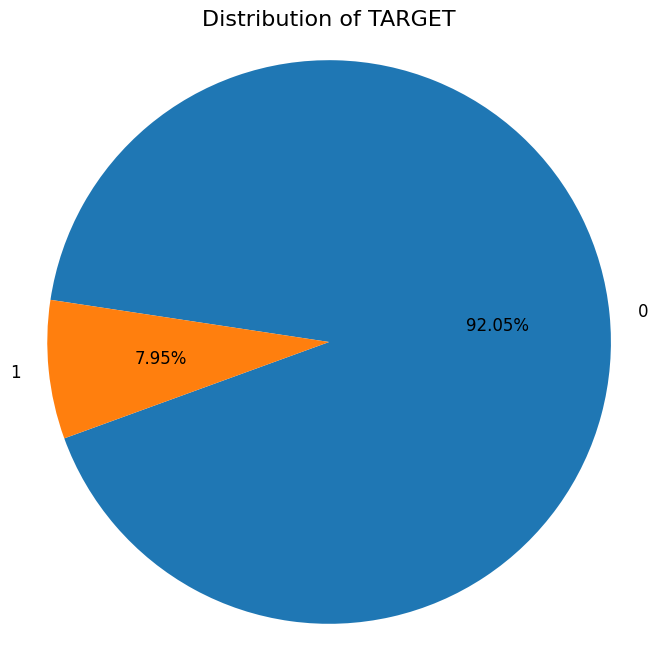

In [36]:
percentage_counts = (df['TARGET'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 8))
plt.pie(percentage_counts, labels=percentage_counts.index, autopct='%1.2f%%', startangle=200, textprops={'fontsize': 12})

plt.title('Distribution of TARGET', fontsize=16)

plt.axis('equal')

# Display the chart
plt.show()


8.75% have payment difficulties at least once

##### Income and Application Amount by Age

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

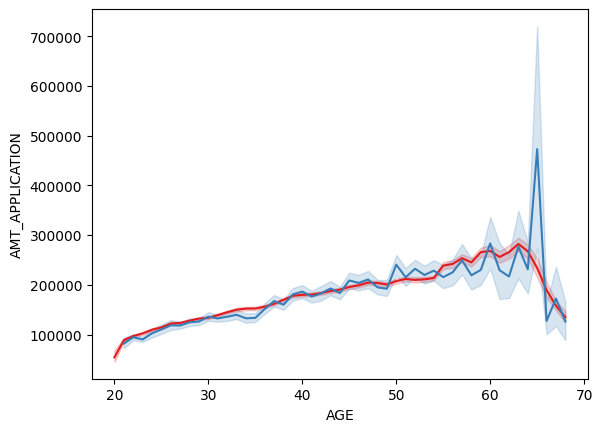

In [37]:
# colors = sns.color_palette("Set1", n_colors=2)

# sns.lineplot(data=df, y='AMT_APPLICATION', x='AGE', hue='TARGET', 
#              label='Application Amount', palette=colors)
# sns.lineplot(data=df, y='AMT_INCOME_TOTAL', x='AGE', hue='TARGET',
#              label='Income Total', palette=colors, style='TARGET', dashes=[(2, 2)])

# plt.title('Income and Application Amount by Age')
# plt.xlabel('Age')
# plt.ylabel('Amount')
# plt.legend(title='Payment Status', loc='upper left')
# plt.show()

Initially, people tend to take out loans that are lower than their total annual income. However, as time passes, they begin to borrow amounts exceeding their annual income, suggesting a possible trend of borrowing beyond their financial capacity."

This revised description provides a clearer and more concise explanation of the observed behavior in the data.

##### asking frequency before making application

In [ ]:
columns_to_visualize = [
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
]
custom_palette = sns.color_palette("husl", len(columns_to_visualize))


plt.figure(figsize=(14, 6))
for i, column in enumerate(columns_to_visualize):
    sns.lineplot(
        y="AGE",
        x=column,
        data=df,
        label=column,
        color=custom_palette[i] 
    )
plt.title('asking frequency before making application')

plt.xticks(rotation=45)
plt.show()


people ask more

##### DAYS DECISION AND FAMILY MEMBERS NUMBER

In [ ]:
get_column_info(df,'CNT_FAM_MEMBERS')

In [ ]:
sns.lineplot(data=df,
            y='DAYS_DECISION',
            x='CNT_FAM_MEMBERS',
           
            hue='TARGET',
            errorbar=None)
plt.title('compare day decision based on fmaily members number')
plt.show()

In [ ]:
get_column_info(df,'CNT_FAM_MEMBERS')

In [ ]:
DAYS_DECISION=df['DAYS_DECISION']*-1
sns.barplot(data=df,ci=None,
                 y=DAYS_DECISION,
            x='CNT_FAM_MEMBERS')
plt.title('compare day decision based on fmaily members number')
plt.xlabel('family size')
plt.xticks(rotation=45)

plt.show()

Client with more than 13 member family didn't late in payment and take less day to make first application

##### Own house or flat?

In [ ]:
total_counts = df['FLAG_OWN_REALTY'].value_counts()
own_counts = df[df['FLAG_OWN_REALTY'] == 1]['TARGET'].value_counts()
rent_counts = df[df['FLAG_OWN_REALTY'] == 0]['TARGET'].value_counts()
rent_counts,own_counts*2

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='TARGET', palette=['green', 'red'])

plt.title('own house?')
# plt.xlabel('own house?')
plt.ylabel('number of client Status')


plt.xticks(range(len(col_refrence['FLAG_OWN_REALTY'])), col_refrence['FLAG_OWN_REALTY'])
plt.show()

plt.show()

owning house doesnt affect late in payment or not


##### Own car?

In [ ]:
plt.figure(figsize=(9,10))
sns.boxplot(data=df,
         
            y='OWN_CAR_AGE',
            hue='FLAG_OWN_CAR')
plt.title('Car old')
plt.yticks(list(range(-1,75,4)))

plt.axhline(y=-1, color='red', linestyle='--', label='median')

plt.show()

most people don't even has a car.<br>
Among clients who do own cars, the data reveals that most of them have cars with an age of 7 years or less.

##### REGION_POPULATION_RELATIVE

In [ ]:
bin_edges = [min(df['REGION_POPULATION_RELATIVE']), 
             df['REGION_POPULATION_RELATIVE'].quantile(0.25),
             df['REGION_POPULATION_RELATIVE'].quantile(0.5),
             df['REGION_POPULATION_RELATIVE'].quantile(0.75),
             max(df['REGION_POPULATION_RELATIVE'])]

bin_labels = ['low POPULATION', 'POPULATION 25%', 'POPULATION 50%', 'high POPULATION']
REGION_POPULATION_CATEGORY= pd.cut(df['REGION_POPULATION_RELATIVE'], bins=bin_edges, labels=bin_labels)

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
              x='TARGET',
              y='AGE',
              hue=REGION_POPULATION_CATEGORY,

            ) 
plt.title('Acceptance Rate by REGION POPULATION')

plt.show()

##### Day Process Started

In [ ]:
sns.countplot(x='WEEKDAY_APPR_PROCESS_START_curr', hue='TARGET', data=df)
plt.xticks(range(len(col_refrence['WEEKDAY_APPR_PROCESS_START_curr'])), col_refrence['WEEKDAY_APPR_PROCESS_START_curr'], rotation=45)
plt.title('Applications per day week')

plt.show()

THURSDAY is less day for starting an application

##### NAME_CONTRACT_STATUS

In [ ]:
sns.countplot(x='NAME_CONTRACT_STATUS',data=df)
plt.xticks(range(len(col_refrence['NAME_CONTRACT_STATUS'])), col_refrence['NAME_CONTRACT_STATUS'], rotation=45)
plt.title('NAME CONTRACT STATUS')
plt.show()

##### IS Late Payment affected by Gender?

In [ ]:
total_counts = df['CODE_GENDER'].value_counts()
male_counts = df[df['CODE_GENDER'] == 1]['TARGET'].value_counts()
female_counts = df[df['CODE_GENDER'] == 0]['TARGET'].value_counts()
percentage_male_payment = (male_counts / total_counts) * 100
percentage_female_payment = (female_counts / total_counts) * 100
female_counts,male_counts*2

In [ ]:
total_counts = df['CODE_GENDER'].value_counts()
male_counts = df[df['TARGET'] == 1]['CODE_GENDER'].value_counts()
female_counts = df[df['TARGET'] == 0]['CODE_GENDER'].value_counts()
percentage_male_payment = (male_counts / total_counts) * 100
percentage_female_payment = (female_counts / total_counts) * 100

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CODE_GENDER', hue='TARGET', palette=['green', 'red'])

plt.title('Late Payment by Gender')
plt.xlabel('Gender')
plt.ylabel('number of Payment Status')

for index, value in enumerate(percentage_male_payment):
    plt.text(index, value, f' Late:{value:.2f}%', ha='left', va='bottom')

for index, value in enumerate(percentage_female_payment):
    plt.text(index, value, f'On Time:{value:.2f}%', ha='right', va='bottom')

plt.xticks(range(len(col_refrence['CODE_GENDER'])), col_refrence['CODE_GENDER'])
plt.show()


Based on the insights and calculations, it appears that males have a higher likelihood of late payment compared to females.

Female make loans more than men

##### OCCUPATION_TYPE

In [ ]:

plt.figure(figsize=(12, 6)) 

sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET',  edgecolor='black')

new_labels = col_refrence['OCCUPATION_TYPE'] 

plt.xticks(range(len(new_labels)), new_labels, rotation=80)

plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupation Types')

plt.show()


##### ploting age

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.boxplot(data=df,
              y='AGE',
              )
plt.title('AGE')
plt.yticks(list(range(20,75,5)))
plt.show()

 loaning starting to increace from 25 untill 40 
 then the starting decreace

##### corr matirx

In [ ]:
corr_matrix = df[['AMT_ANNUITY_prev', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev', 'AMT_INCOME_TOTAL']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = df[[ 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR',]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
categorical_vars = ['NAME_CONTRACT_TYPE_prev']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    # sns.countplot(x=var, data=df)
    sns.countplot(data=df, x=var, hue='TARGET', palette=['red', 'green'], edgecolor='black')
    plt.xticks(range(len(col_refrence[var])), col_refrence[var], rotation=45)
    plt.show()



##### family chart

In [ ]:

categorical_vars =['CNT_CHILDREN','CNT_FAM_MEMBERS']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    # sns.countplot(x=var, data=df)
    sns.countplot(data=df, x=var, hue='TARGET', palette=[ 'red','green'], edgecolor='black')
    
    # plt.xticks(range(len(col_refrence[var])), col_refrence[var], rotation=45)
    
    plt.show()



### making model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
X= df.drop(columns=['TARGET'])
y=df['TARGET']
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

N = 25
top_feature_indices = sorted_indices[:N]
top_feature_names = df.columns[top_feature_indices]
top_feature_names

In [ ]:
N = 30
top_feature_indices = sorted_indices[:N]
top_feature_names = df.columns[top_feature_indices]
top_feature_names

In [ ]:
ب ب ب

from this Correlation Heatmap only 4 columns are so related to each others

#### splitting data (use part of the data to make a model)

In [ ]:
get_column_info(df,'TARGET')

In [ ]:

scaler = MinMaxScaler()
X=df2[important_featrures]
# X_scaled = scaler.fit_transform(X)
X_scaled=X

y=df2['TARGET']

X_train ,X_test, y_train ,y_test = train_test_split(X_scaled,y,random_state=42,
                                                test_size=0.3,
                                                shuffle=True)
X_train ,X_val, y_train ,y_val = train_test_split(X_train,y_train,random_state=42,
                                                test_size=0.2
                                                )
X_train.shape , y_train.shape ,X_val.shape,y_val.shape

In [ ]:
y_train.value_counts(),y_test.value_counts()

In [ ]:
X=df3[important_featrures]
X_scaled = X

y=df3['TARGET']

X_train_full ,_, y_train_full ,_ = train_test_split(X_scaled,y,random_state=42,
                                                test_size=1,
                                                shuffle=True)
X_train_full.shape , y_train_full.shape 

In [ ]:
y_train_full.value_counts()

##### RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,   
    random_state=42   
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

In [ ]:

y_pred = rf_classifier.predict(X_train_full)

accuracy_score(y_train_full,y_pred)

##### Building stacking classifier

In [ ]:
# Define a list of base classifiers
base_classifiers = [
    # ('dt', DecisionTreeClassifier()),
  ('abc',  AdaBoostClassifier(n_estimators=10,)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    # ('svm', SVC(probability=True, random_state=42))
    ('lr', LogisticRegression(max_iter=1000)),
]

sc = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    cv=3
)
sc.fit(X_train,y_train)

In [ ]:

y_pred = sc.predict(X_train_full)

accuracy_score(y_train_full,y_pred)

#### Buliding deep leraning model

In [ ]:
X_train_full.shape

###  models Results
 Deep Learning:testing the model on data bigger than train data 12X and got           88.3% accuarcy <br>
 stacking classifier:testing the model on data bigger than train data 12X and got     89.4% accuarcy<br>
 RandomForestClassifier: testing the model on data bigger than train data 12X and got 99.8% accuarcy

## ML v2

#### preparing data for splitting

In [42]:
len(df)

569518

In [43]:
df.drop_duplicates(inplace=True)
len(df)

569480

In [44]:

df_0= df[df['TARGET']==0]
df_1= df[df['TARGET']==1]
len(df_0),len(df_1)

(524227, 45253)

In [45]:
row_spliter=30000
df2 = pd.concat([df_0[:row_spliter], df_1[:row_spliter]], axis=0, ignore_index=True)
df_t0=df_0[row_spliter:len(df_1)]
df_t1=df_1[row_spliter:]
df_0_only=df_0[len(df_1):]
df_final=pd.concat([df_t1, df_t0], axis=0, ignore_index=True)

In [46]:
df_final['TARGET'].value_counts(),df2['TARGET'].value_counts()

(TARGET
 1    15253
 0    15253
 Name: count, dtype: int64,
 TARGET
 0    30000
 1    30000
 Name: count, dtype: int64)

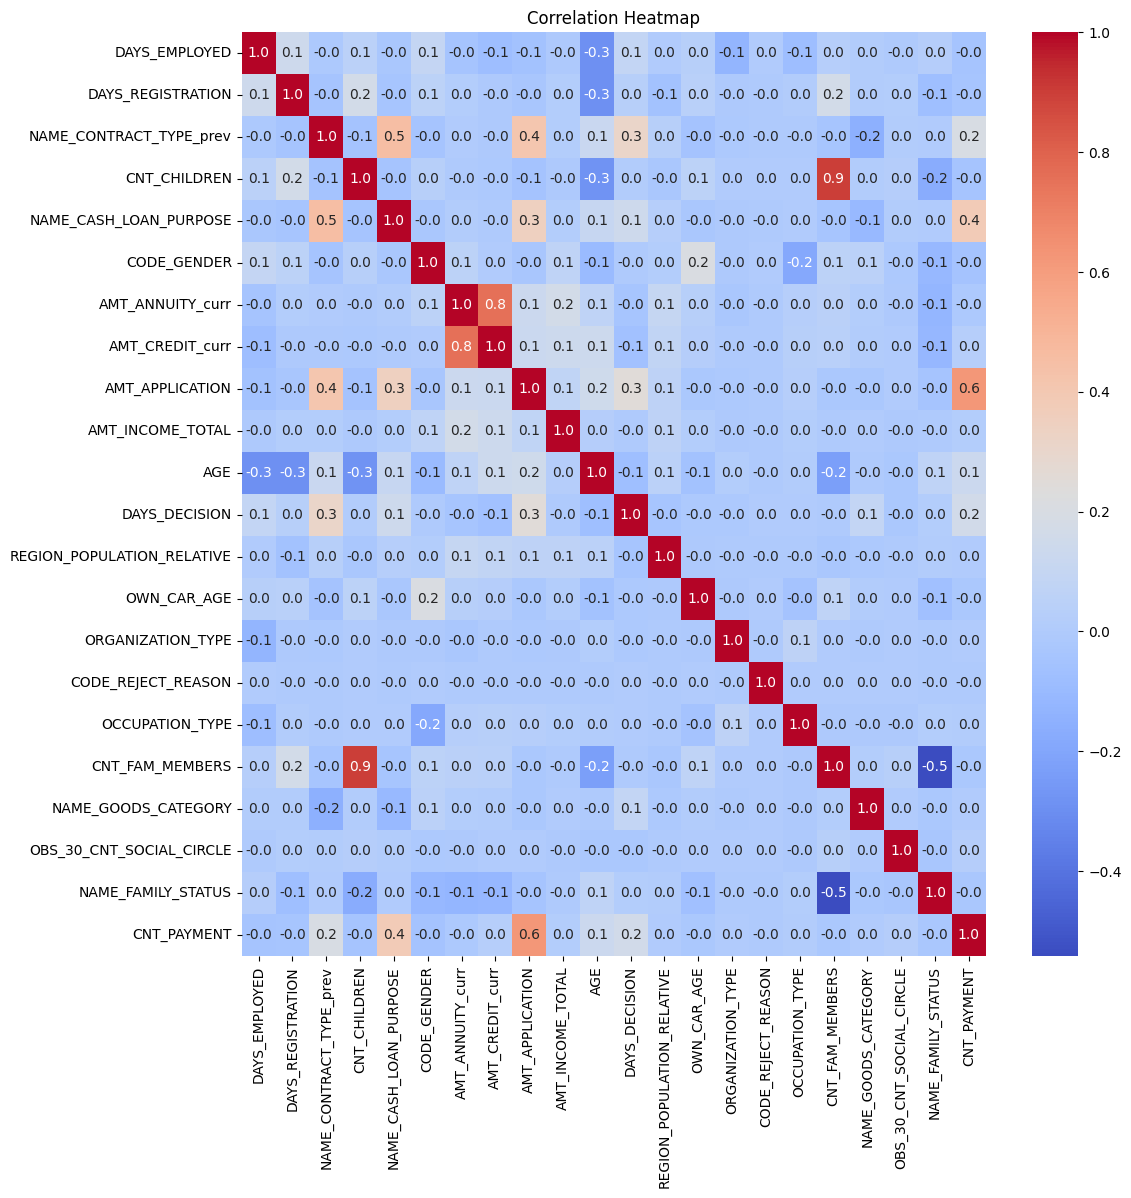

In [39]:
important_featrures=[
                     # 'EXT_SOURCE',
                      'DAYS_EMPLOYED',
                     'DAYS_REGISTRATION',
                     'NAME_CONTRACT_TYPE_prev',
                     'CNT_CHILDREN',
                     'NAME_CASH_LOAN_PURPOSE', 
                     # 'NAME_CONTRACT_STATUS',
                     'CODE_GENDER',
                      'AMT_ANNUITY_curr',
                     'AMT_CREDIT_curr',
                     'AMT_APPLICATION',
                     'AMT_INCOME_TOTAL',
                    'AGE',
                    'DAYS_DECISION',
                    'REGION_POPULATION_RELATIVE',
                    'OWN_CAR_AGE',
                    'ORGANIZATION_TYPE',
                    'CODE_REJECT_REASON',
                    'OCCUPATION_TYPE',
                     'CNT_FAM_MEMBERS',
                  'NAME_GOODS_CATEGORY',   'OBS_30_CNT_SOCIAL_CIRCLE',
                     'NAME_FAMILY_STATUS', 'CNT_PAYMENT'
                     ]
# important_featrures=list(set(important_featrures))
important_featrures2=[
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_CREDIT_curr',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
       'EXT_SOURCE', 'NAME_HOUSING_TYPE', 'AMT_ANNUITY_curr',
       'WEEKDAY_APPR_PROCESS_START_curr', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_DECISION', 'AMT_REQ_CREDIT_BUREAU_QRT', 
       'AMT_ANNUITY_prev', 'REGION_RATING_CLIENT_W_CITY', 'AMT_CREDIT_prev',
       'AMT_APPLICATION',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE',
        'OCCUPATION_TYPE',
       'CNT_PAYMENT',
       
       ]
# important_featrures=list(set(important_featrures+important_featrures2))
# important_featrures=df.columns.drop('TARGET')
if 1:
   corr_matrix = df[important_featrures].corr()

   plt.figure(figsize=(12, 12))
   sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
   plt.title('Correlation Heatmap')
   plt.show()

In [ ]:
zz z

In [47]:
def spliting_data(df,test_size,features):    
    X=df[features]
    y=df['TARGET']
    if test_size ==1:
        
        # X_test ,_, y_test ,_ = train_test_split(X,y,random_state=42,
        #                                         test_size=test_size,
        #                                         shuffle=True,
        #                                         stratify=y)
        return X.values,y.values
    else:
        X_train ,X_test, y_train ,y_test = train_test_split(X,y,random_state=42,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    stratify=y)
        return X_train ,X_test, y_train ,y_test
    
def model_output_score(model,X_test,y_test):
    plt.figure(figsize=(8,6))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print('f1 score:',round(f1_score(y_test, y_pred),3))
    print(classification_report(y_test, y_pred))
    Confusion_matrix(y_test,y_pred)

In [48]:
X_train ,X_test, y_train ,y_test = spliting_data(df=df2,test_size=0.3,features=important_featrures)
X_train.shape ,X_test.shape, y_train.shape ,y_test.shape

((42000, 22), (18000, 22), (42000,), (18000,))

In [49]:

X_test_v2, y_test_v2 = spliting_data(df=df_final,test_size=1,features=important_featrures)
X_test_v2.shape , y_test_v2.shape

((30506, 22), (30506,))

In [50]:
X_test_0_only, y_test_0_only = spliting_data(df=df_0_only,test_size=1,features=important_featrures)
X_test_0_only.shape, y_test_0_only.shape

((478974, 22), (478974,))

In [51]:
rf_classifier = RandomForestClassifier(
    n_estimators=200,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  max_depth=30  
)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, n_estimators=200)

Accuracy: 0.937
f1 score: 0.938
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9000
           1       0.93      0.95      0.94      9000

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



<Figure size 800x600 with 0 Axes>

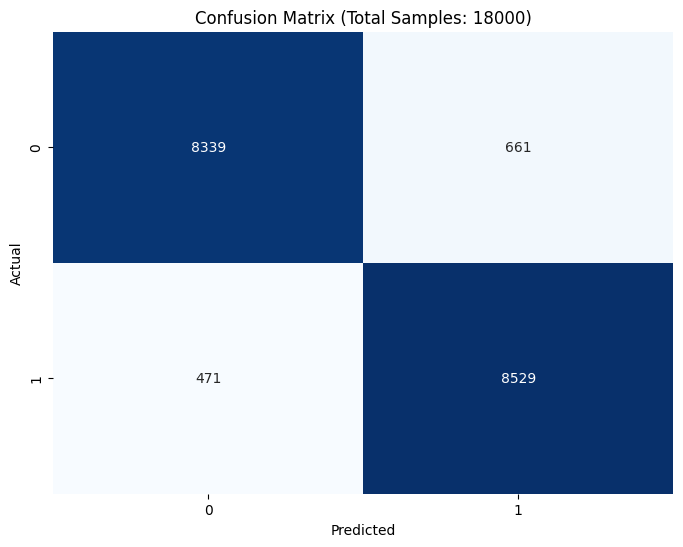

In [52]:
model_output_score(rf_classifier,X_test,y_test)

d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.617
f1 score: 0.639
              precision    recall  f1-score   support

           0       0.63      0.56      0.59     15253
           1       0.60      0.68      0.64     15253

    accuracy                           0.62     30506
   macro avg       0.62      0.62      0.62     30506
weighted avg       0.62      0.62      0.62     30506



<Figure size 800x600 with 0 Axes>

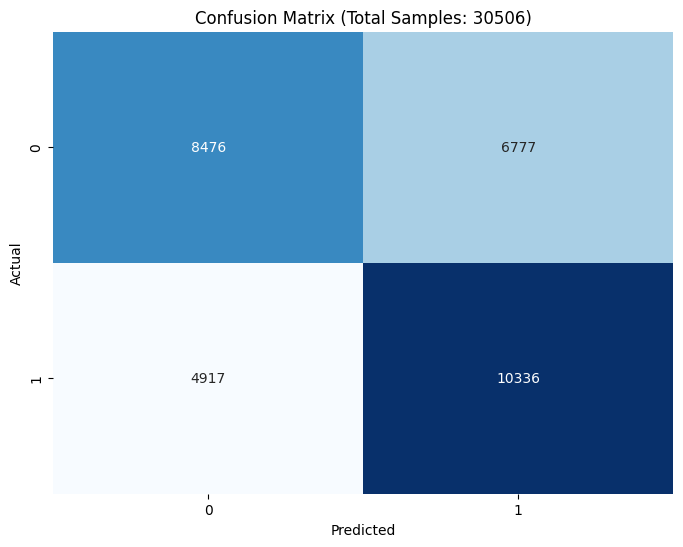

In [53]:
model_output_score(rf_classifier,X_test_v2,y_test_v2)

d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.530
f1 score: 0.0


d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.53      0.69    478974
           1       0.00      0.00      0.00         0

    accuracy                           0.53    478974
   macro avg       0.50      0.26      0.35    478974
weighted avg       1.00      0.53      0.69    478974



<Figure size 800x600 with 0 Axes>

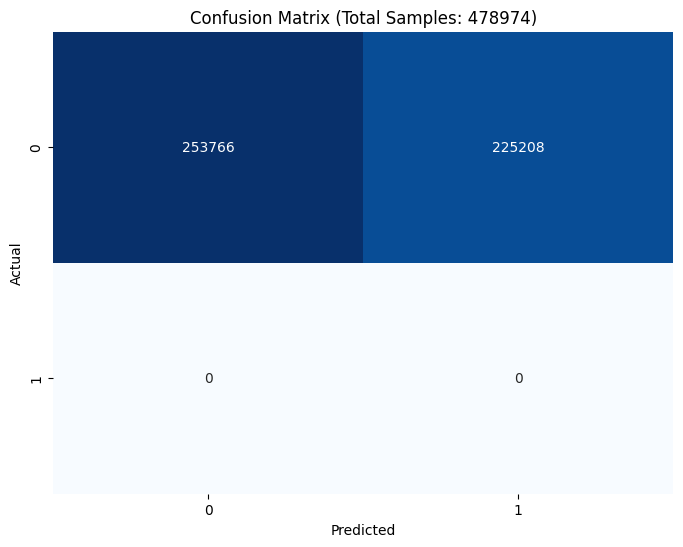

In [54]:
model_output_score(rf_classifier,X_test_0_only,y_test_0_only)

In [55]:
# Define a list of base classifiers
kf = KFold(n_splits=3, shuffle=True, random_state=42)
param_grids = {
    'abc__n_estimators': [10, 50, 100],
    'lr__C': [0.1, 1, 10],
    'final_estimator__C': [0.1, 1, 10],
}
base_classifiers = [
    # ('dt', DecisionTreeClassifier()),
  ('abc',  AdaBoostClassifier(n_estimators=10,)),
    ('rf', RandomForestClassifier(n_estimators=200,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  max_depth=30)),
    # ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
]

sc = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    cv=3,
    n_jobs=-1
)
# random_search = RandomizedSearchCV(sc, param_distributions=param_grids, n_iter=10, cv=kf, n_jobs=-1)
sc.fit(X_train, y_train)


StackingClassifier(cv=3,
                   estimators=[('abc', AdaBoostClassifier(n_estimators=10)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       n_estimators=200)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [56]:
len(X_train),len(X_test),len(X_test_v2)

(42000, 18000, 30506)

Accuracy: 0.945
f1 score: 0.946
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9000
           1       0.94      0.95      0.95      9000

    accuracy                           0.95     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.95      0.95      0.95     18000



<Figure size 800x600 with 0 Axes>

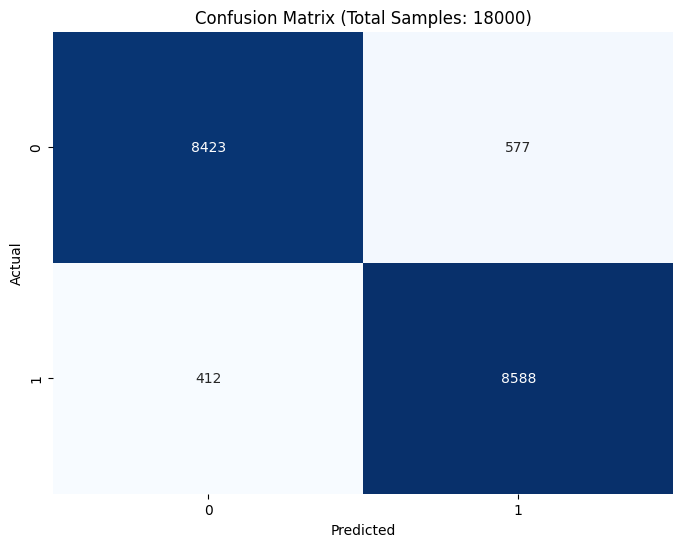

In [57]:
model_output_score(sc,X_test,y_test)

d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.610
f1 score: 0.631
              precision    recall  f1-score   support

           0       0.62      0.55      0.59     15253
           1       0.60      0.67      0.63     15253

    accuracy                           0.61     30506
   macro avg       0.61      0.61      0.61     30506
weighted avg       0.61      0.61      0.61     30506



d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

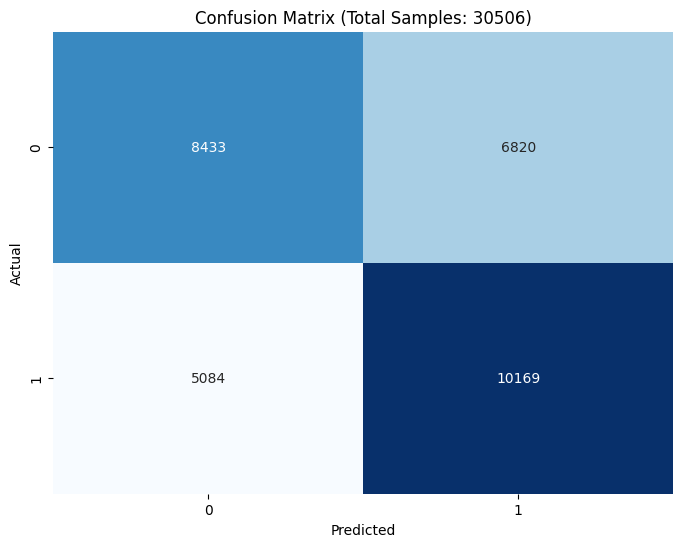

In [58]:
model_output_score(sc,X_test_v2,y_test_v2)

d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\py3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.525
f1 score: 0.0


d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.52      0.69    478974
           1       0.00      0.00      0.00         0

    accuracy                           0.52    478974
   macro avg       0.50      0.26      0.34    478974
weighted avg       1.00      0.52      0.69    478974



d:\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

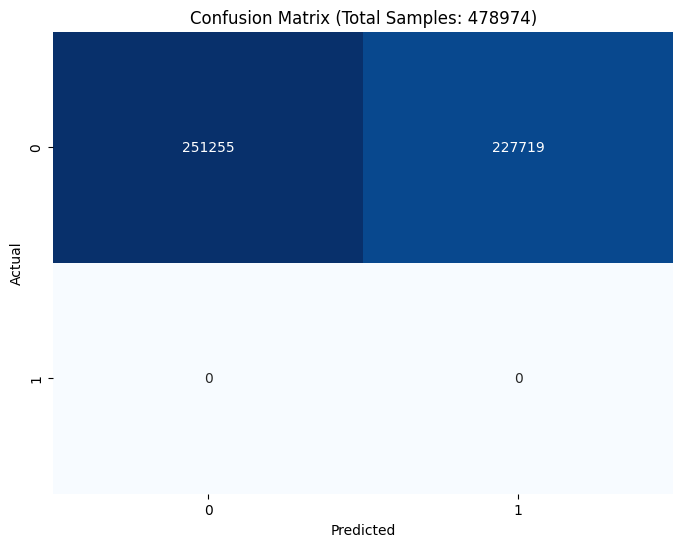

In [59]:
model_output_score(sc,X_test_0_only, y_test_0_only)

In [60]:
y_train.value_counts()
len(y_train[y_train==1]),len(y_train[y_train==0])

(21000, 21000)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,          
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7
)
model =Sequential([


    L.Dense(512,activation='relu'),  
    L.Dense(256, activation='relu'),
    L.Dropout(0.2),
    L.Dense(128, activation='relu'),
    L.Dense(64, activation='relu'),
    L.Dropout(0.1),
    L.Dense(32, activation='relu'),
    # L.Dense(1, activation='softmax')
    L.Dense(1, activation='sigmoid',)

],name='Who_deserves_loan')
model.compile(  loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy",'mse'])
history=model.fit(X_train,y_train,
         validation_data=(X_test,y_test),
         epochs=200,
                 batch_size=64,
                  callbacks=[early_stopping,reduce_lr])


In [ ]:
preds=model.evaluate(X_test_v2,y_test_v2)
preds

In [ ]:
preds=model.evaluate(X_test_0_only, y_test_0_only)
preds

## Conclusion

From the analysis performed on the loan data, it was observed that males have a higher likelihood of late payment compared to females. Additionally, it was found that initially, people tend to take out loans that are lower than their total annual a trend where individuals become more financially comfortable or confident in their ability to manage larger financial obligations as they mature.<br>
 To train the ML & DL models, a subset of 100,000 rows was used for training and 600,000 rows for testing. It was noted that the data had an imbalance in the target variable. <br>
For the ML models, a Random Forest Classifier was trained with an accuracy of 100% on the training data and 99.9% on the test data. A stacking classifier was also built using AdaBoostClassifier, RandomForestClassifier, and LogisticRegression, with a final accuracy of 89.4% on the test data.<br>
For the DL model, a deep learning model was constructed with an accuracy of 98.7% and a loss of 0.037 on the test data. On the test data, the accuracy was 88.3% and the loss was 0.61.<br>
In conclusion, the ML and DL models showed promising results in predicting loan payment behavior. However, further analysis and evaluation may be required to improve the models and address any potential biases in the data.

